In [47]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load VGG16 model pre-trained on ImageNet


In [48]:
base_model = VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 4s 0us/step


# Remove last layer of the model


In [ ]:
base_model.layers.pop()

In [30]:
IMAGE_SIZE = [224, 224]

MyDrive  Shareddrives


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls '/content/drive'


In [31]:
#Give dataset path
train_path = '/content/drive/MyDrive/Dataset/data/train'
test_path = '/content/drive/MyDrive/Dataset/data/test'

Working with 1440 images
Image examples: 
1002.jpg


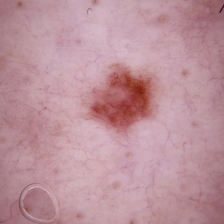

1001.jpg


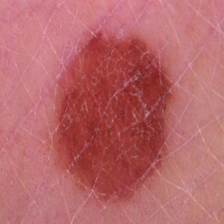

1000.jpg


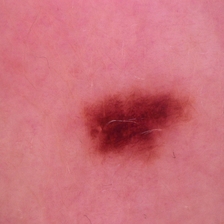

100.jpg


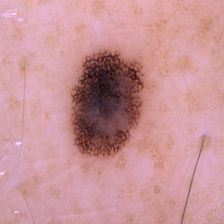

1036.jpg


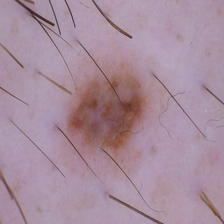

1035.jpg


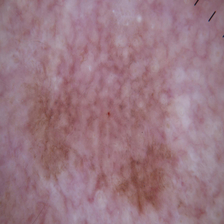

1031.jpg


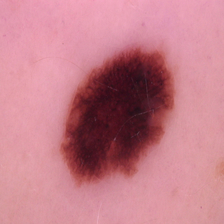

1032.jpg


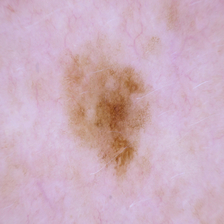

103.jpg


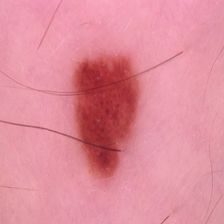

1030.jpg


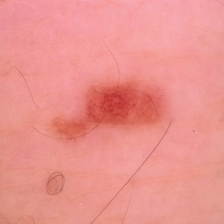

In [32]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [33]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [35]:
for layer in vgg.layers:
  layer.trainable = False

In [36]:
folders = glob('/content/drive/MyDrive/Dataset/data/test/*')
print(len(folders))

2


In [37]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [38]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [40]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [41]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [42]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 679 images belonging to 2 classes.


In [43]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-43-4a1a319319e3>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10



Epoch 1: val_loss improved from inf to 2.52970, saving model to mymodel.h5
5/5 - 568s - loss: 3.7455 - accuracy: 0.6313 - val_loss: 2.5297 - val_accuracy: 0.7776 - 568s/epoch - 114s/step
Epoch 2/10


5/5 - 108s - loss: 2.2754 - accuracy: 0.7437 - 108s/epoch - 22s/step
Epoch 3/10


5/5 - 108s - loss: 1.7646 - accuracy: 0.8000 - 108s/epoch - 22s/step
Epoch 4/10


5/5 - 107s - loss: 1.4943 - accuracy: 0.8250 - 107s/epoch - 21s/step
Epoch 5/10


5/5 - 116s - loss: 1.2831 - accuracy: 0.8750 - 116s/epoch - 23s/step
Epoch 6/10


5/5 - 109s - loss: 1.4344 - accuracy: 0.8188 - 109s/epoch - 22s/step
Epoch 7/10


5/5 - 126s - loss: 1.4051 - accuracy: 0.8188 - 126s/epoch - 25s/step
Epoch 8/10


5/5 - 117s - loss: 1.5927 - accuracy: 0.8000 - 117s/epoch - 23s/step
Epoch 9/10


5/5 - 124s - loss: 1.6615 - accuracy: 0.8000 - 124s/epoch - 25s/step
Epoch 10/10


5/5 - 114s - loss: 1.4740 - accuracy: 0.8062 - 114s/epoch - 23s/step
Training completed in time:  0:28:05.780489


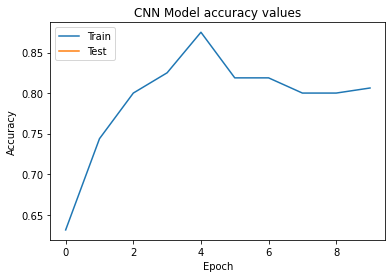

In [45]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
